In [ ]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
files = glob.glob("*_cv_results_norm_summary_*.csv")
rows = []

for f in files:
    name = os.path.basename(f)

    parts = name.split("_")
    raw_method = parts[0].lower()      
    network = parts[-1].replace(".csv", "").upper() 

    method_map = {"louvian": "Louvain", "lpa": "LPA", "sslpa": "SSLPA", "sc": "SC"}
    method = method_map.get(raw_method, raw_method.capitalize())

    df = pd.read_csv(f)
    df.insert(0, "method", method)
    df.insert(1, "network", network)
    rows.append(df)

merged = pd.concat(rows, ignore_index=True)
merged.to_csv(os.path.join("community_detection_cv_summary_all.csv"), index=False)
print("Saved:", os.path.join("community_detection_cv_summary_all.csv"))


Saved: community_detection_cv_summary_all.csv


/tmp/ipykernel_577004/3620964049.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("network", as_index=True)["coverage"].mean().round(4).to_dict()


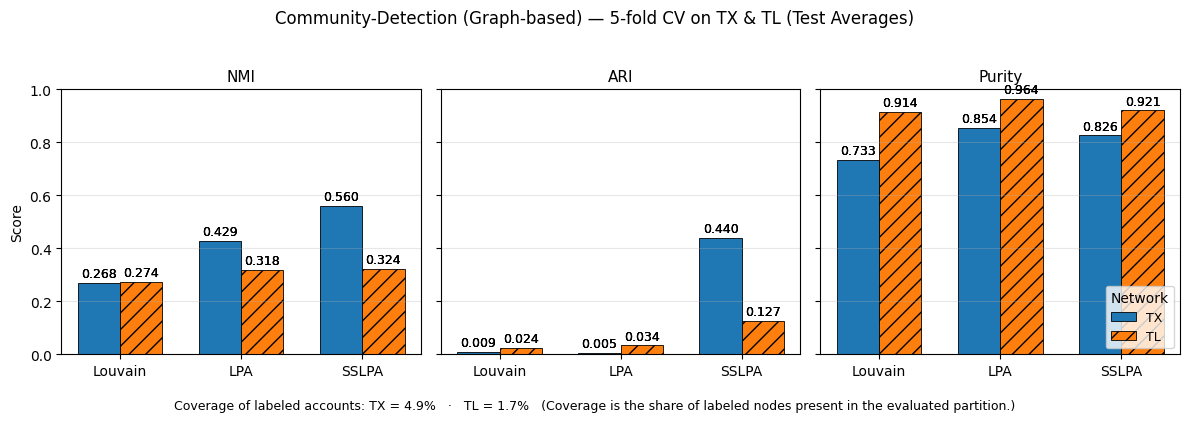

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


CSV = "community_detection_cv_summary_all.csv"
METHOD_ORDER  = ["Louvain", "LPA", "SSLPA", "SC"]
NETWORK_ORDER = ["TX", "TL"]
METRICS = [("Avg_NMI_test", "NMI"), ("Avg_ARI_test", "ARI"), ("Avg_Purity_test", "Purity")]
COLORS = {"TX": "#1f77b4", "TL": "#ff7f0e"} 
HATCH  = {"TX": "", "TL": "//"} 
ROUND_TO = 3



df = pd.read_csv(CSV)

df["method"]  = pd.Categorical(df["method"],  METHOD_ORDER,  ordered=True)
df["network"] = pd.Categorical(df["network"], NETWORK_ORDER, ordered=True)
df = df.sort_values(["method", "network"]).reset_index(drop=True)

coverage_by_net = (
    df.groupby("network", as_index=True)["coverage"].mean().round(4).to_dict()
)

plt.rcParams.update({
    "font.size": 10,
    "axes.titlesize": 11,
    "axes.labelsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 9,
})

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
bar_width = 0.35
x = np.arange(len(METHOD_ORDER))

for i, (col, label) in enumerate(METRICS):
    ax = axes[i]
    for j, net in enumerate(NETWORK_ORDER):
        sub = df[df["network"] == net]
        y = [float(sub.loc[sub["method"] == m, col].values[0]) for m in METHOD_ORDER]
        bars = ax.bar(
            x + j * bar_width,
            y,
            width=bar_width,
            label=net if i == 2 else None,   
            color=COLORS[net],
            hatch=HATCH[net],
            edgecolor="black",
            linewidth=0.6,
        )

        for b, val in zip(bars, y):
            ax.bar_label(
                bars,
                labels=[f"{v:.{ROUND_TO}f}" for v in y],
                padding=2,
                fontsize=9
            )

    ax.set_title(label)
    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(METHOD_ORDER)
    ax.set_ylim(0, 1)
    ax.grid(alpha=0.3, axis="y")
    if i == 0:
        ax.set_ylabel("Score")
    if i == 2:
        leg = ax.legend(title="Network", loc="lower right", frameon=True, edgecolor="0.8")
        leg._legend_box.align = "left"

fig.suptitle("Community-Detection (Graph-based) — 5-fold CV on TX & TL (Test Averages)", y=0.98, fontsize=12)
tx_cov = coverage_by_net.get("TX", np.nan) * 100
tl_cov = coverage_by_net.get("TL", np.nan) * 100
fig.text(
    0.5, -0.02,
    f"Coverage of labeled accounts: TX = {tx_cov:.1f}%   ·   TL = {tl_cov:.1f}%   "
    f"(Coverage is the share of labeled nodes present in the evaluated partition.)",
    ha="center", fontsize=9
)

fig.tight_layout(rect=[0, 0.02, 1, 0.95])

plt.show()


/tmp/ipykernel_1580086/1652675656.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("network", as_index=True)["coverage"].mean().round(4).to_dict()


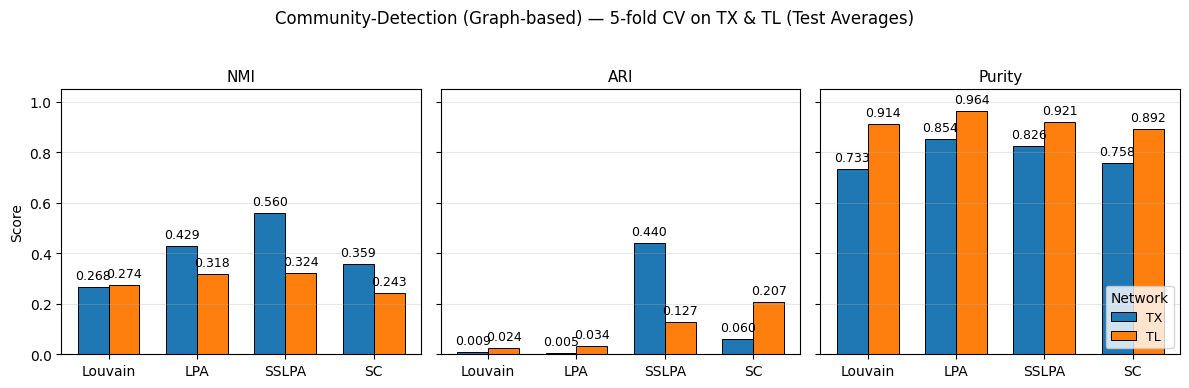

In [ ]:


CSV = "community_detection_cv_summary_all.csv"
METHOD_ORDER  = ["Louvain", "LPA", "SSLPA", "SC"]
NETWORK_ORDER = ["TX", "TL"]
METRICS = [("Avg_NMI_test", "NMI"), ("Avg_ARI_test", "ARI"), ("Avg_Purity_test", "Purity")]

COLORS = {"TX": "#1f77b4", "TL": "#ff7f0e"} 
HATCH  = {"TX": "", "TL": "//"}
ROUND_TO = 3

df = pd.read_csv(CSV)

df["method"]  = pd.Categorical(df["method"],  METHOD_ORDER,  ordered=True)
df["network"] = pd.Categorical(df["network"], NETWORK_ORDER, ordered=True)
df = df.sort_values(["method", "network"]).reset_index(drop=True)

coverage_by_net = (
    df.groupby("network", as_index=True)["coverage"].mean().round(4).to_dict()
)

plt.rcParams.update({
    "font.size": 10,
    "axes.titlesize": 11,
    "axes.labelsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 9,
})

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
bar_width = 0.35
x = np.arange(len(METHOD_ORDER))

for i, (col, label) in enumerate(METRICS):
    ax = axes[i]
    max_y = 0.0

    for j, net in enumerate(NETWORK_ORDER):
        sub = df[df["network"] == net]
        y = [float(sub.loc[sub["method"] == m, col].values[0]) for m in METHOD_ORDER]
        max_y = max(max_y, max(y))

        bars = ax.bar(
            x + j * bar_width,
            y,
            width=bar_width,
            label=net if i == 2 else None,
            color=COLORS[net],
            edgecolor="black",
            linewidth=0.7,
        )

        for bar, val in zip(bars, y):
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 0.02,
                f"{val:.{ROUND_TO}f}",
                ha="center",
                va="bottom",
                fontsize=9,
            )

    ax.set_title(label)
    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(METHOD_ORDER)

    ax.set_ylim(0, min(1.05, max_y + 0.1))

    ax.grid(alpha=0.3, axis="y")
    if i == 0:
        ax.set_ylabel("Score")
    if i == 2:
        leg = ax.legend(title="Network", loc="lower right", frameon=True, edgecolor="0.8")
        leg._legend_box.align = "left"

fig.suptitle("Community-Detection (Graph-based) — 5-fold CV on TX & TL (Test Averages)", y=0.98, fontsize=12)
tx_cov = coverage_by_net.get("TX", np.nan) * 100
tl_cov = coverage_by_net.get("TL", np.nan) * 100



fig.tight_layout(rect=[0, 0.02, 1, 0.95])
plt.show()
